# 1. Data Extraction

# 2. Preprocessing

In [16]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/data_car.csv')
data.describe()

,Unnamed: 0,mpg,cylinders,displacement,weight,accel,myear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,198.500000,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,115.036951,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,0.000000,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,99.250000,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,198.500000,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,297.750000,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,397.000000,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
Unnamed: 0      398 non-null int64
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
accel           398 non-null float64
myear           398 non-null int64
origin          398 non-null int64
car             398 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [0]:
# Check how many ? are in the database
# data[data.mpg == '?'].shape[0]
# data[data.cylinders == '?'].shape[0]
# data[data.displacement == '?'].shape[0]
# data[data.horsepower == '?'].shape[0] #6
# data[data.weight == '?'].shape[0]
# data[data.accel == '?'].shape[0]
# data[data.myear == '?'].shape[0]
# data[data.origin == '?'].shape[0]

In [0]:
#Remove the ? from the database
data = data.drop(data[data.horsepower == '?'].index)
#Convert to float column horsepower
data['horsepower']=data['horsepower'].astype(float)

In [19]:
#Check if we removed the ? and the type of the column was changed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
Unnamed: 0      392 non-null int64
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
accel           392 non-null float64
myear           392 non-null int64
origin          392 non-null int64
car             392 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 33.7+ KB


In [20]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
# Label Binarizer for Origin(1, 2 and 3)
lb_origin=lb.fit_transform(data['origin'])
origin1=[]
origin2=[]
origin3=[]
for i in range(len(data)):
    origin1.append(lb_origin[i][0])
    origin2.append(lb_origin[i][1])
    origin3.append(lb_origin[i][2])

data['origin1']=origin1
data['origin2']=origin2
data['origin3']=origin3

data.drop(['origin'],axis=1,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 12 columns):
Unnamed: 0      392 non-null int64
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
accel           392 non-null float64
myear           392 non-null int64
car             392 non-null object
origin1         392 non-null int64
origin2         392 non-null int64
origin3         392 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 39.8+ KB


Text(0.5, 1.0, 'X variables')

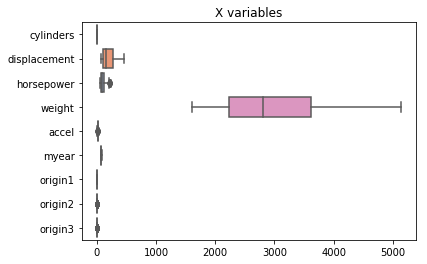

In [21]:
X = (data.drop(['mpg','car','Unnamed: 0'],axis=1))
import seaborn as sns
import matplotlib.pyplot as plt # Plotting
#################
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_title('X variables')

# 3. Analysis 

In [0]:
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import tree # To get Decision Tree
from sklearn.linear_model import SGDRegressor #to get the SGDRegressor
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To generate evaluation metrices
from sklearn.model_selection import cross_val_score # To generate evaluation metrices

Decision Tree Analysis

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,data['mpg'],test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
#Initialise a Decision Tree with maximum depth of 3
dtRegressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

(313, 9)
(79, 9)


Crossvalidation Coefficient of determination on training set : 0.7626153754012722




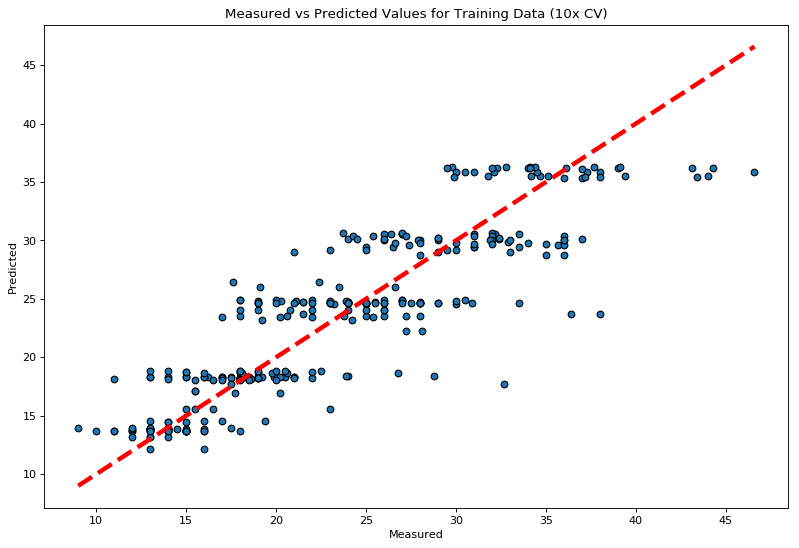

In [24]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(dtRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(dtRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

In [25]:
# Fit the model and predict
dtRegressor.fit(X_train,y_train)
y_predicted = dtRegressor.predict(X_test)

# Model Performance on test data
r2_score = dtRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)


Coefficient of determination on test set:  0.8073733591931604

Mean Squared Error on test set : 11.97276950849976


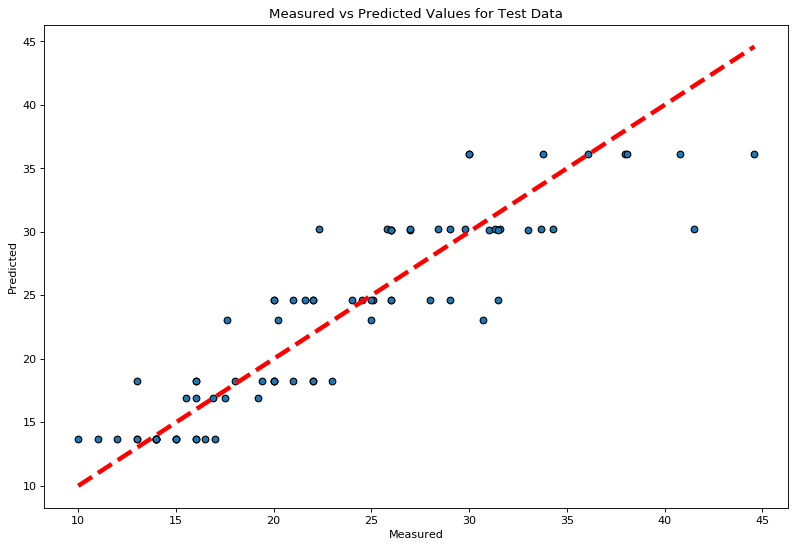

In [26]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

[0 2 5 8 7 6 4 3 1] [0.7002675  0.         0.19130285 0.         0.         0.10842965
 0.         0.         0.        ]


Text(0.5, 1.0, 'Variable Importance')

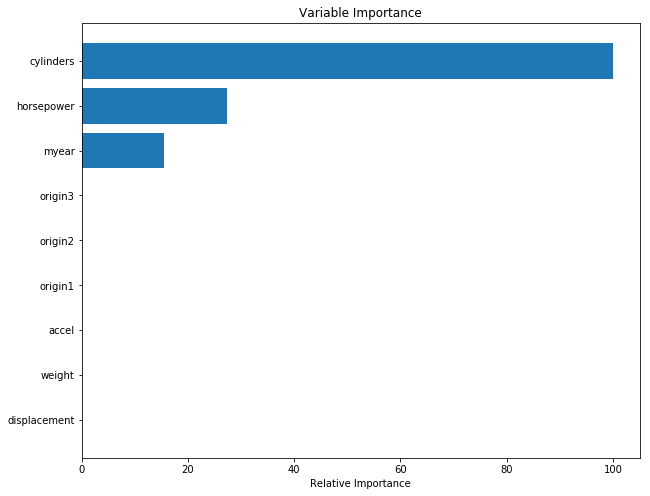

In [27]:
feature_names = X.columns
importances = dtRegressor.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices,importances)

# #############################################################################
# Plot feature importance
feature_importance = dtRegressor.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

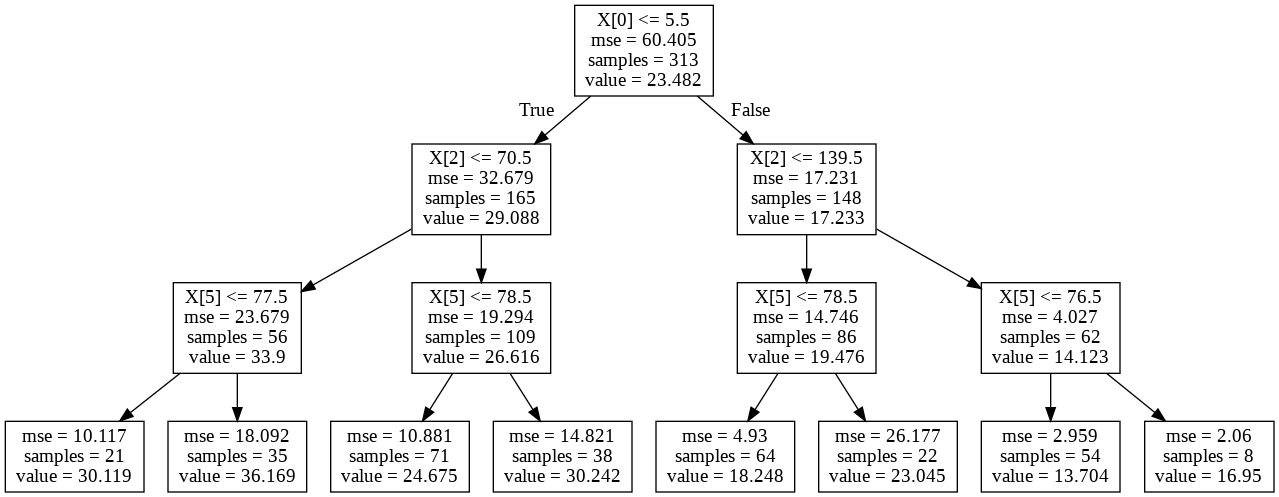

In [28]:
from sklearn import tree
from IPython.display import Image
import io


# Let's give dot_data some space so it will not feel nervous any more
dot_data = io.StringIO()
tree.export_graphviz(dtRegressor, out_file=dot_data)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in path
Image(graph.create_png())

SGDRegressor Analysis

Text(0.5, 1.0, 'X variables')

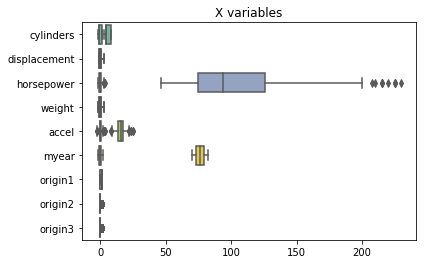

In [29]:
#Scale the numeric variables to avoid 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[['displacement','weight']]= scaler.fit_transform(X[['displacement','weight']])
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_title('X variables')
scaler=StandardScaler()
X[['horsepower','myear','accel','cylinders']]= scaler.fit_transform(X[['horsepower','myear','accel','cylinders']])
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_title('X variables')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,data['mpg'],test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

#SGD Regressor with L1 penalty
SGDReg = SGDRegressor(loss='squared_loss', penalty='l1', alpha=0.0001,
                 l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, 
                 shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling',
                 eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1,
                 n_iter_no_change=5, warm_start=False, average=False)

(313, 9)
(79, 9)


Crossvalidation Coefficient of determination on training set : 0.79469063870081




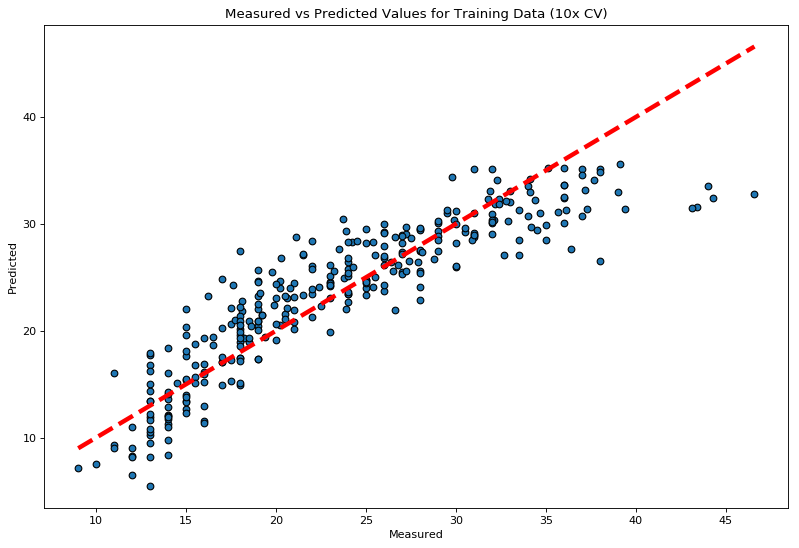

In [31]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(SGDReg, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(SGDReg, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")

# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

Text(0.5, 1.0, 'X variables')

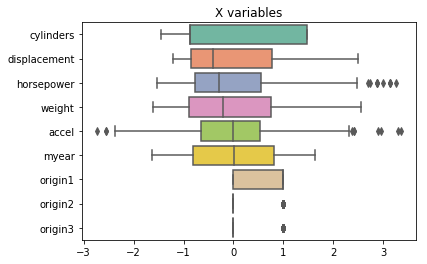

In [32]:
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_title('X variables')

In [33]:
# Fit the model and predict
SGDReg.fit(X_train,y_train)
y_predicted = SGDReg.predict(X_test)

# Model Performance on test data
r2_score = SGDReg.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.8354834709819839

Mean Squared Error on test set : 10.225576659701483


In [34]:
coef = SGDReg.coef_
intercept = SGDReg.intercept_
print('Intercept: {}'.format(intercept))

# No iterables are passed
result = zip()

# Converting itertor to list
resultList = list(result)
print(resultList)

# Two iterables are passed
result = zip(X, coef)

# Converting itertor to set
resultSet = set(result)
print(resultSet)

Intercept: [17.97768356]
[]
{('displacement', 0.8443372224462629), ('cylinders', -0.09624024635093403), ('horsepower', -0.41222848913750393), ('origin1', 4.66073889390401), ('origin2', 6.650747714595556), ('accel', 0.25896487150288977), ('myear', 2.7789127751835268), ('origin3', 6.65561021604374), ('weight', -5.325347071163075)}
